In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv(r'C:\Users\wipip\OneDrive\Documentos\GitHub\Serie-termporal--main\data\raw\Aquifer_Petrignano.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [5]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


Vamos a limpiar los datos, eliminando filas con valores nulos o columnas de ser necesario

In [6]:
df_cleaned = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano', 'Volume_C10_Petrignano'], axis=1)


Asignaremos nombres mas simples para facilitar la interpretacion y analisis

In [7]:
df_cleaned.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'hydrometry']


In [8]:
df_cleaned = df_cleaned[df_cleaned['rainfall'].notna()].reset_index(drop=True)
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d/%m/%Y')

In [9]:
df_cleaned = df_cleaned.dropna()

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 0 to 4198
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4172 non-null   datetime64[ns]
 1   rainfall              4172 non-null   float64       
 2   depth_to_groundwater  4172 non-null   float64       
 3   temperature           4172 non-null   float64       
 4   hydrometry            4172 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 195.6 KB


analizamos graficamente el nivel de agua subterranea 

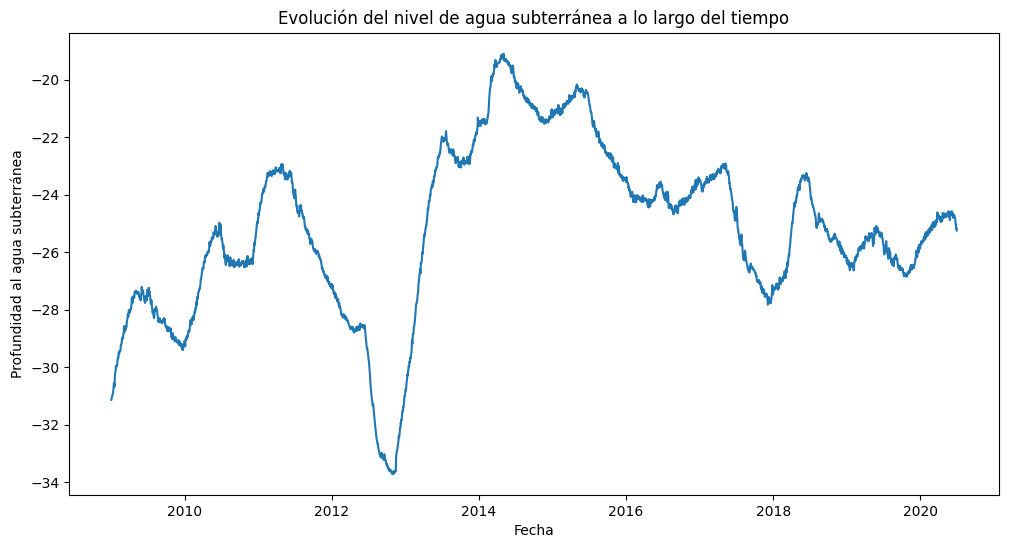

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='depth_to_groundwater', data=df_cleaned)
plt.title('Evolución del nivel de agua subterránea a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Profundidad al agua subterránea')
plt.show()

Ahora analizamos la correlacion

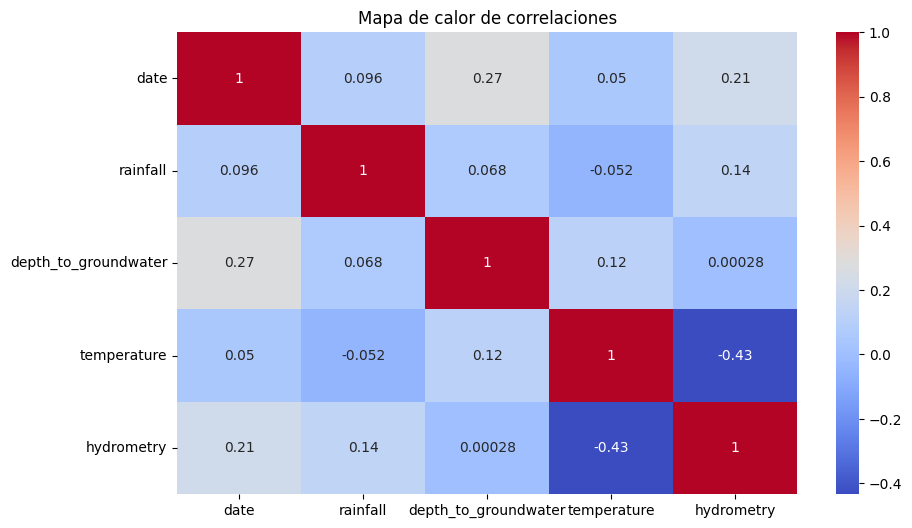

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

La variable de temperatura y el nivel hidrométrico muestran correlación moderada con la profundidad del agua subterránea.

Inicialmente haremos un modelo de regreison lineal para ver como se ajusta

In [13]:
features = ['rainfall', 'temperature', 'hydrometry']
target = 'depth_to_groundwater'
X = df_cleaned[features]
y = df_cleaned[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)


In [19]:
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 2.9145384972507005
MAE: 2.2682253121521754


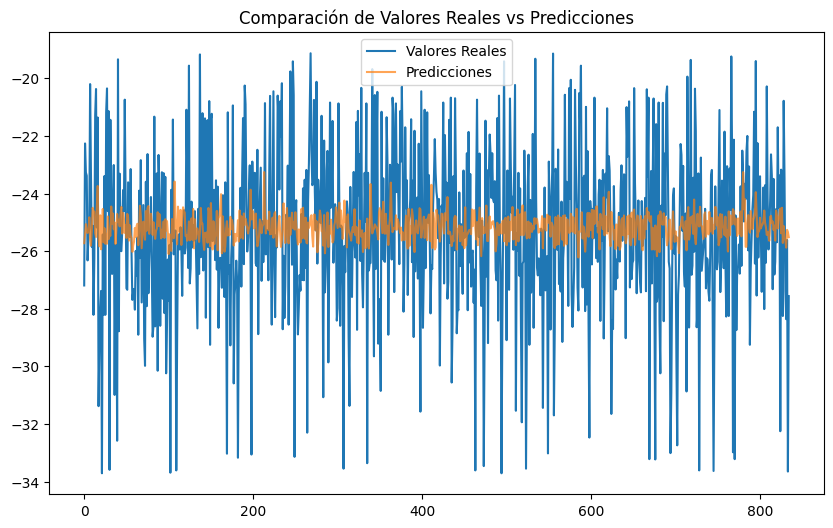

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales')
plt.plot(y_pred, label='Predicciones', alpha=0.7)
plt.legend()
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

En este caso vemos que el modelo tiene un rendimiento relativamente aceptable, podemos ver que los valores de nuestras metricas inidican un error promedio que puede considerarse bajo, sin embargo tenemos errores mas grandes presentes, lo cual es evidente desde que vemos el valor del RMSE. 

Tambien vemos que el modelo captura el comportamiento de los datos, sin embargo se tienen grandes picos de dispersion, lo que nos dice que aunque el modelo entienda la tendencia, hay una gran cantidad de casos donde outliers o errores en los datos afectan el rendimiento, por lo que sabemos que podria mejorar en muchos aspectos. 

### Ahora implemetaremos SARIMA 

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [22]:
df_sarima = df_cleaned[['date', 'depth_to_groundwater']].set_index('date')


In [23]:
train_size = int(len(df_sarima) * 0.8)
train_data, test_data = df_sarima[:train_size], df_sarima[train_size:]


In [24]:
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)


c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
sarima_pred = sarima_fit.get_forecast(steps=len(test_data))
sarima_pred_ci = sarima_pred.conf_int()


c:\Users\wipip\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
predicted_values = sarima_pred.predicted_mean


In [27]:
sarima_rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
sarima_mae = mean_absolute_error(test_data, predicted_values)


In [28]:
print(f'RMSE SARIMA: {sarima_rmse}')
print(f'MAE SARIMA: {sarima_mae}')


RMSE SARIMA: 3.157946117020402
MAE SARIMA: 2.955316959854517


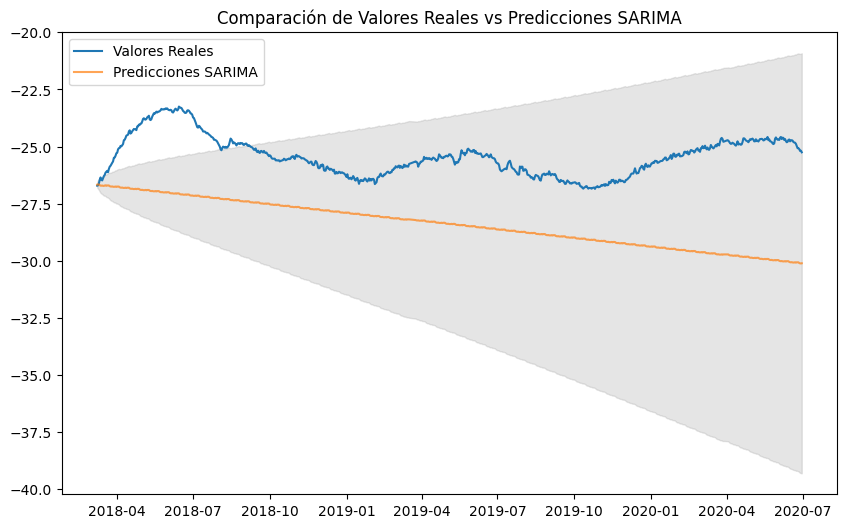

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['depth_to_groundwater'], label='Valores Reales')
plt.plot(test_data.index, predicted_values, label='Predicciones SARIMA', alpha=0.7)
plt.fill_between(test_data.index, sarima_pred_ci.iloc[:, 0], sarima_pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('Comparación de Valores Reales vs Predicciones SARIMA')
plt.show()

### Ahora utilizamos prophet

In [46]:
df_prophet = df_cleaned[['date', 'depth_to_groundwater']].rename(columns={'date': 'ds', 'depth_to_groundwater': 'y'})


In [47]:
train_size = int(len(df_prophet) * 0.8)
train_data_prophet = df_prophet[:train_size]
test_data_prophet = df_prophet[train_size:]


In [48]:
model_prophet = Prophet()



In [49]:
model_prophet.fit(train_data_prophet)



15:26:48 - cmdstanpy - INFO - Chain [1] start processing
15:26:49 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future = model_prophet.make_future_dataframe(periods=len(test_data_prophet), freq='D')
forecast = model_prophet.predict(future)



In [51]:
forecast_values = forecast[['ds', 'yhat']]


In [52]:
aligned_test = test_data_prophet[test_data_prophet['ds'].isin(forecast_values['ds'])]
aligned_forecast = forecast_values[forecast_values['ds'].isin(aligned_test['ds'])]


In [53]:
prophet_rmse = np.sqrt(mean_squared_error(aligned_test['y'], aligned_forecast['yhat']))
prophet_mae = mean_absolute_error(aligned_test['y'], aligned_forecast['yhat'])


In [54]:
print(f'RMSE Prophet: {prophet_rmse}')
print(f'MAE Prophet: {prophet_mae}')


RMSE Prophet: 2.9951855854567633
MAE Prophet: 2.821540873477954


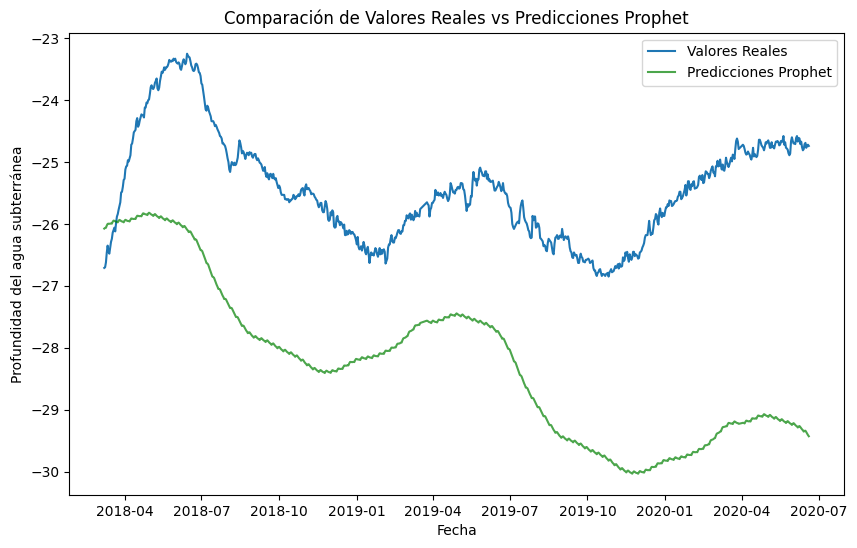

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(aligned_test['ds'], aligned_test['y'], label='Valores Reales')
plt.plot(aligned_forecast['ds'], aligned_forecast['yhat'], label='Predicciones Prophet', alpha=0.7, color='green')
plt.legend()
plt.title('Comparación de Valores Reales vs Predicciones Prophet')
plt.xlabel('Fecha')
plt.ylabel('Profundidad del agua subterránea')
plt.show()

El modelo de prophet es muy bueno para capturar la tendencia y fluctuaciones a largo plazo en los datos pero le cuesta un poco de trabajo las de corto plazo, por lo que determinamos que es adecuado utilizarlo como herramienta para modelar tendencias suaves y estacionalidades claras.

Aun asi presenta un mejor comportamiento que los otros 2